In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Ground Truth

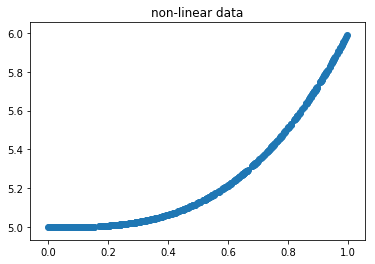

In [2]:
X = np.random.rand(500,1).flatten()
y = X ** 3 + 5
_ = plt.scatter(X,y)
_ = plt.title("non-linear data")

## Preprocess

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

scalarX, scalarY = MinMaxScaler(), MinMaxScaler()

# scale and split the data
X_train, X_test, y_train, y_test = train_test_split(scalarX.fit_transform(X.reshape(-1,1)), 
                                                    scalarY.fit_transform(y.reshape(-1,1)), 
                                                    test_size=0.33, random_state=42)

## Models

In [4]:
def fnResults(modelName):
    yhat = scalarY.inverse_transform(model.predict(X_test).reshape(-1,1))
    _=plt.scatter(X_test,yhat,label='predicted')
    _=plt.scatter(X_test,scalarY.inverse_transform(y_test),label='actual')
    _=plt.title("{} mse={:.5f}".format(modelName,
                                       1000 * mean_squared_error(scalarY.inverse_transform(y_test),yhat)))
    _=plt.legend()

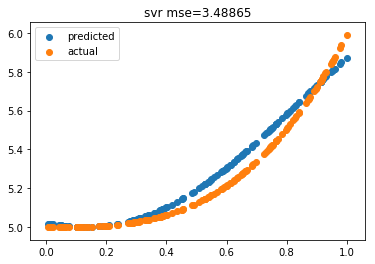

In [5]:
from sklearn.svm import SVR
# svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
model = SVR(gamma='auto')
model = model.fit(X_train, y_train.ravel())
fnResults('svr')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


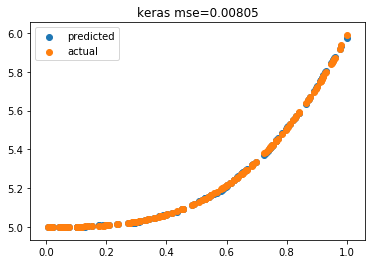

In [7]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
# model.summary()
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train,epochs=500, verbose=0,batch_size=50)
fnResults('keras')

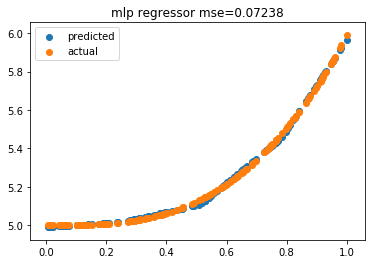

In [14]:
from sklearn.neural_network import MLPRegressor
# from sklearn import tree, ensemble, linear_model, svm

# from sklearn.model_selection import GridSearchCV
# gs = GridSearchCV(mlp, param_grid={'activation': ["identity", "logistic", "tanh", "relu"]},cv=3)

model = MLPRegressor(hidden_layer_sizes=(10), activation='relu', solver='lbfgs')
model = model.fit(X_train, y_train.ravel())
fnResults('mlp regressor')